In [1]:
import numpy as np
import pandas as pd
import os
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import sqlite3 #connect to databse using this
import scipy
import seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 9.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

conn = sqlite3.connect('/content/drive/My Drive/BTTAI/All_Receptors.db')

Mounted at /content/drive


In [3]:
# Connect to the database
# conn = sqlite3.connect('C:\\Users\\lapad\\Alkermes\\All_Receptors.db')
# conn = sqlite3.connect('/Users/tiffneyaina/Downloads/All_Receptors.db')
# conn = sqlite3.connect('C:/Users/bkuzn/Downloads/All_Receptors.db')
# print(os.path.exists('C:\\Users\\lapad\\Alkermes\\All_Receptors.db'))
# print(os.path.exists(conn))


In [4]:


# Create a cursor object to interact with the database
cursor = conn.cursor()

# Check all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Display the tables
print("Tables in the database:", tables)

Tables in the database: [('Assays5-HT1a',), ('Assays5-HT2a',), ('Assays5-HT2b',), ('Assays5-HT2c',), ('AssaysD2',), ('Bioactivity5-HT1a',), ('Bioactivity5-HT2a',), ('Bioactivity5-HT2b',), ('Bioactivity5-HT2c',), ('BioactivityD2',)]


### Let's focus on BioactivityD2 for now, and answer our questions

In [5]:
# Write your SQL query
query = "SELECT * FROM BioactivityD2"

# Use pandas to read the SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Display the first few rows of the table
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL307800,None,None,494.47,1,5.82,47,O=C(NCCCCN1CCN(c2cccc(Cl)c2Cl)CC1)C1c2ccccc2-c...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1134599,1,Scientific Literature,J Med Chem,2001,None,None,None,None
1,CHEMBL1200623,ETHYLESTRENOL,4.0,288.48,1,5.09,ETHYLESTRENOL,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,Ki,None,...,SINGLE PROTEIN,CHEMBL1909046,15,DrugMatrix,None,None,CHEMBL3308072,None,None,None
2,CHEMBL156164,None,None,352.46,0,-0.35,3,NC(=O)C1CCS[C@@H]2C[C@]3(CCCN3C(=O)[C@@H]3CCCN...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1132286,1,Scientific Literature,J Med Chem,1999,None,None,None,None
3,CHEMBL3423332,None,None,527.63,1,2.66,8,Cn1c(=O)c2c(nc3n(CCCCN4CCN(c5ccccc5O)CC4)c(-c4...,Activity,'=',...,SINGLE PROTEIN,CHEMBL3421538,1,Scientific Literature,Eur J Med Chem,2015,CHEMBL3307512,None,None,None
4,CHEMBL1834258,None,None,348.49,0,4.57,20,c1ccc(CCCCN2CCN(Cc3cc4ccccc4o3)CC2)cc1,Ki,'=',...,SINGLE PROTEIN,CHEMBL1833923,1,Scientific Literature,Bioorg Med Chem Lett,2011,None,None,None,None


In [6]:
#number of compounds
print(df.shape[0])

23596


In [7]:
# Query to get all column names from your table
query = "PRAGMA table_info(BioactivityD2);"

# Execute the query to get the schema of the table
df_columns = pd.read_sql(query, conn)

# Print the column names
print("Column Names:", df_columns['name'].tolist())

Column Names: ['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase', 'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key', 'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment', 'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate', 'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID', 'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction', 'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation', 'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type', 'Document ChEMBL ID', 'Source ID', 'Source Description', 'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties', 'Action Type', 'Standard Text Value']


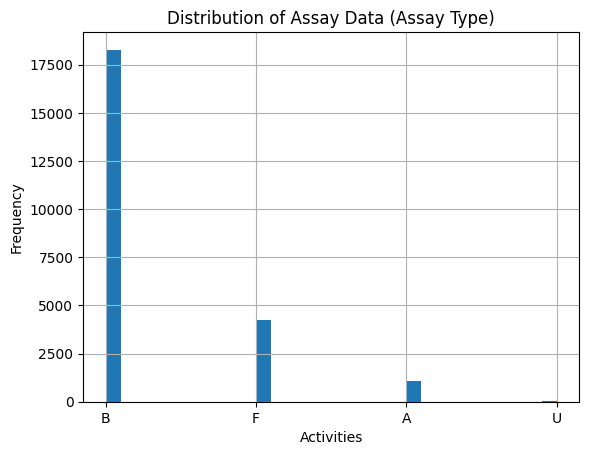

In [8]:
data = pd.read_sql("SELECT [Assay Type] FROM BioactivityD2", conn)

# Plot a histogram of the assay data
data['Assay Type'].hist(bins=30)  # Adjust the number of bins as necessary
plt.title('Distribution of Assay Data (Assay Type)')
plt.xlabel('Activities')
plt.ylabel('Frequency')
plt.show()

In [9]:
unique_values = df['Standard Type'].unique()
print(unique_values)

['Ki' 'Activity' 'RH' 'Inhibition' 'Intrinsic activity' 'IC50' 'EC50'
 'Ratio' 'Log Ki' 'Bmax' 'pKb' 'RL' 'RH/RL' 'log(activity)' 'pKi' 'Emax'
 'KiH' 'Imax' 'Ratio EC50' 'Stimulation' 'Ki(app)' 'Efficacy'
 'deltalog(Tau/KA)' 'Kd' 'nH' 'Intinsic activity' 'K' 'pD2' 'FC' 'KL' 'IA'
 'pKA' 'ED50' 'Ratio Ki' 'Kb' 'Selectivity Index' 'Max effect' 'logKi'
 'p[A]50' 'log(Tau/KA)' '% Ctrl' 'Binding affinity' 'AC50' 'pEC50'
 'Potency' 'T1/2' 'Ke' 'K0.5' 'Ratio IC50' '%max' 'TIME' 'Ka' 'Kdiss'
 'D2 duration' 'INH' 'Selectivity' 'pIC50' 'Delta pKi'
 '% Inhibition of Control Specific Binding (Mean n=2)' 'Activity_index'
 'KiL' 'p[A50]' 'Occ' 'Effect' '% of Control Agonist Response (Mean n=2)'
 'Mean fold stimulation'
 '% Inhibition of Control Agonist Response (Mean n=2)' '% of inhibition'
 'effect' 'EC5' 'Inhibition (% of control)' 'Activation (% of control)']


In [10]:
unique_values = df['Standard Relation'].unique()
print(unique_values)

["'='" None "'>'" "'<'" "'~'" "'<='" "'>='"]


### Create the Canonical SMILES column

In [13]:
#Convert SMILES to Canonical SMILES
#apply: applys a fnc to every element in series
#lambda: str represents each SMILES string in column
#Chem.MolFromSmiles: RDKit takes string and converts to molecular object
# Initialize an empty list to store canonical SMILES

def create_smiles() :
  canonical_smiles_list = []

  #Go through SMILES strings
  for smiles in df['Smiles']:
      try:
          #Attempt to convert the SMILES string to a canonical SMILES
          mol = Chem.MolFromSmiles(smiles)
          if mol is not None:
              canonical_smiles = Chem.MolToSmiles(mol, canonical=True)
          else:
              canonical_smiles = None
      except:
          #Set canonical_smiles to None
          canonical_smiles = None

      canonical_smiles_list.append(canonical_smiles)

      df['Canonical_SMILES'] = canonical_smiles_list
      df[['Smiles', 'Canonical_SMILES']].head()

### Keep only columns of interest

In [14]:
# List of columns to keep
columns_to_keep = [
    'Molecule ChEMBL ID', 'AlogP', 'Compound Key', 'Smiles',
    'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value',
    'Assay ChEMBL ID', 'Assay Description', 'BAO Format ID',
    'BAO Label', 'Assay Tissue ChEMBL ID', 'Assay Type', 'Assay Tissue Name', 'Assay Cell Type', 'Canonical_SMILES','Target Organism'
]

# Subset the DataFrame to keep only the specified columns
df_subset = df[columns_to_keep]

# Display the first few rows of the new DataFrame
df_subset.head()

KeyError: "['Canonical_SMILES'] not in index"

### Filter by 'Target Organism' being 'Homo sapiens'

In [ ]:
# Filter the DataFrame to keep only rows where 'Target Organism' is 'Homo sapiens'
df_filtered = df_subset[df_subset['Target Organism'] == 'Homo sapiens']

# Display the filtered DataFrame
df_filtered.shape

(23596, 19)

### Filter by functional assay type (“F” in “Assay Type” column)

In [ ]:
# Subset the DataFrame to keep only rows where 'Assay Type' is 'B'
df_filtered = df_filtered[df_filtered['Assay Type'] == 'F']

# Display the first few rows of the filtered DataFrame
df_filtered.head()

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
7,CHEMBL3423340,3.29,25,Cc1cn2c3c(=O)n(C)c(=O)n(C)c3nc2n1CCCCCN1CCN(c2...,Inhibition,'=',20.9,%,None,CHEMBL3423566,Antagonist activity against human dopamine D2L...,BAO_0000219,cell-based format,None,F,None,HEK293,Cc1cn2c3c(=O)n(C)c(=O)n(C)c3nc2n1CCCCCN1CCN(c2...,Homo sapiens
10,CHEMBL11066,2.59,(+/-)-8d,CCCN1CC[C@@H]2Cc3c(O)cccc3C[C@H]21,Intrinsic activity,'=',79.0,%,None,CHEMBL659149,Intrinsic activity from GTP shift using CHO ce...,BAO_0000219,cell-based format,None,F,None,CHO,CCCN1CC[C@@H]2Cc3c(O)cccc3C[C@H]21,Homo sapiens
28,CHEMBL133093,3.97,12d,O=C(N[C@@H]1CC[C@H]2C[C@H](N3CCN(c4ccccn4)CC3)...,EC50,'>',1000.0,nM,None,CHEMBL671809,In vitro inhibition of forskolin-stimulated cA...,BAO_0000219,cell-based format,None,F,None,GH4-C1,O=C(N[C@@H]1CC[C@H]2C[C@H](N3CCN(c4ccccn4)CC3)...,Homo sapiens
31,CHEMBL71599,4.6,13,CCCN(Cc1ccc(F)cc1)[C@@H]1CCc2c(cccc2OC)C1,Inhibition,'=',-5.2,%,None,CHEMBL669154,"Inhibition of [35S]GTP-gamma-S, binding to cel...",BAO_0000019,assay format,None,F,None,None,CCCN(Cc1ccc(F)cc1)[C@@H]1CCc2c(cccc2OC)C1,Homo sapiens
34,CHEMBL244277,4.37,7,Cc1cnc(-c2ccc3c(c2)CCN(CCCSc2nnc(-c4cccn4C)n2C...,Ki,'=',1258.93,nM,5.90,CHEMBL895462,Displacement of [35S]GTP-gamma-S from human cl...,BAO_0000219,cell-based format,None,F,None,CHO,Cc1cnc(-c2ccc3c(c2)CCN(CCCSc2nnc(-c4cccn4C)n2C...,Homo sapiens


### Count the number of unique assays (number of unique values in the “Assay ChEMBL ID” column) to see how many assays are there

In [ ]:
value_counts = df_filtered['Assay ChEMBL ID'].value_counts().head(30)

print(value_counts)

Assay ChEMBL ID
CHEMBL866136     106
CHEMBL866786     106
CHEMBL1107668    105
CHEMBL4842095     91
CHEMBL4842093     89
CHEMBL948181      82
CHEMBL4394473     62
CHEMBL4341176     60
CHEMBL1285353     58
CHEMBL3396204     56
CHEMBL3239706     56
CHEMBL4416278     51
CHEMBL4842094     49
CHEMBL4842096     49
CHEMBL1057875     47
CHEMBL1106075     46
CHEMBL4341179     45
CHEMBL4345332     44
CHEMBL4309250     44
CHEMBL3887361     43
CHEMBL859832      43
CHEMBL895462      42
CHEMBL4010159     40
CHEMBL4045104     37
CHEMBL4309252     37
CHEMBL2169115     37
CHEMBL902499      37
CHEMBL2169116     37
CHEMBL4309251     36
CHEMBL931096      36
Name: count, dtype: int64


Text(0, 0.5, 'Counts')

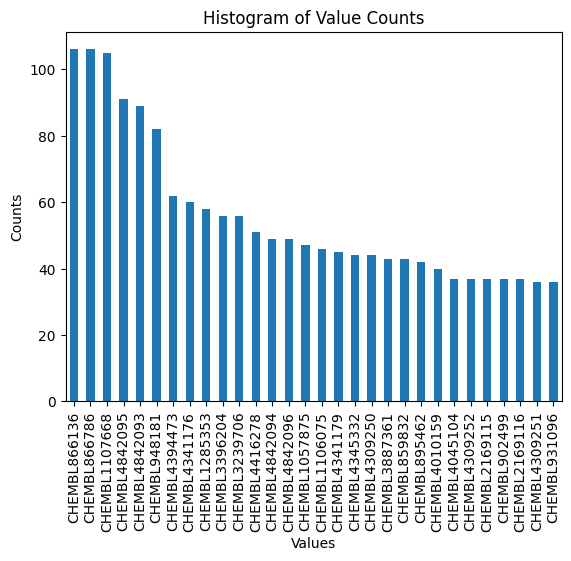

In [ ]:
value_counts.plot(kind='bar') # Add title and labels
plt.title('Histogram of Value Counts')
plt.xlabel('Values')
plt.ylabel('Counts')

# Analysis of IC50

In [ ]:
# Filter the DataFrame to only include rows where 'Standard Type' is 'IC50'
df_ic50 = df_filtered[df_filtered['Standard Type'] == 'IC50']

df_ic50.head()

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
194,CHEMBL301242,5.54,5,O=C(NCCCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1cccc2c1-c1...,IC50,'=',35.6,nM,7.45,CHEMBL827419,Mitogenic stimulation or antagonism of 30 nM q...,BAO_0000219,cell-based format,None,F,None,CHO,O=C(NCCCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1cccc2c1-c1...,Homo sapiens
336,CHEMBL3084502,4.84,31,O[C@]1(c2ccc(Cl)cc2)C[C@H]2CC[C@@H](C1)N2Cc1c[...,IC50,'=',48.3,nM,7.32,CHEMBL1033065,Antagonist activity at dopamine D2 receptor,BAO_0000019,assay format,None,F,None,None,O[C@]1(c2ccc(Cl)cc2)C[C@H]2CC[C@@H](C1)N2Cc1c[...,Homo sapiens
367,CHEMBL2331599,3.93,3e,Cc1cc2c(cc1O)[C@H]1C[C@](O)(c3ccc(Cl)cc3)CCN1CC2,IC50,'=',150.0,nM,6.82,CHEMBL2346209,Antagonist activity at dopamine D2 receptor (u...,BAO_0000219,cell-based format,None,F,None,CHO,Cc1cc2c(cc1O)[C@H]1C[C@](O)(c3ccc(Cl)cc3)CCN1CC2,Homo sapiens
501,CHEMBL4074326,3.55,12l,Cc1nc2n(c(=O)c1CCN1CCN(c3cccc4sccc34)CC1)CCC=C...,IC50,'=',9.44,nM,8.03,CHEMBL4045104,Antagonist activity at dopamine D2 receptor (u...,BAO_0000357,single protein format,None,F,None,None,Cc1nc2n(c(=O)c1CCN1CCN(c3cccc4sccc34)CC1)CCC=C...,Homo sapiens
502,CHEMBL4104261,3.94,12f,Cc1nc2n(c(=O)c1CCN1CCN(c3cccc4sccc34)CC1)CCCC2F,IC50,'=',3.32,nM,8.48,CHEMBL4045104,Antagonist activity at dopamine D2 receptor (u...,BAO_0000357,single protein format,None,F,None,None,Cc1nc2n(c(=O)c1CCN1CCN(c3cccc4sccc34)CC1)CCCC2F,Homo sapiens


In [ ]:
#number of compounds
print(df_ic50.shape[0])

506


In [ ]:
value_counts = df_ic50['Assay ChEMBL ID'].value_counts()
np.sum(value_counts)
print(value_counts)

Assay ChEMBL ID
CHEMBL866136     106
CHEMBL1285353     58
CHEMBL4045104     37
CHEMBL4254801     30
CHEMBL2328744     28
CHEMBL3806800     27
CHEMBL4187998     23
CHEMBL4339971     19
CHEMBL4619928     19
CHEMBL827419      17
CHEMBL1777184     17
CHEMBL895651      16
CHEMBL4345342     12
CHEMBL4011216     10
CHEMBL939457       9
CHEMBL4708967      7
CHEMBL2346209      7
CHEMBL671063       6
CHEMBL2342830      6
CHEMBL1033065      5
CHEMBL3372150      4
CHEMBL3387745      4
CHEMBL4195154      4
CHEMBL671743       4
CHEMBL3738649      3
CHEMBL4276601      2
CHEMBL3561985      2
CHEMBL4709853      2
CHEMBL3872774      2
CHEMBL1044818      2
CHEMBL3562090      2
CHEMBL1005621      2
CHEMBL1919022      2
CHEMBL2182829      2
CHEMBL3295410      1
CHEMBL3413550      1
CHEMBL874196       1
CHEMBL959903       1
CHEMBL959904       1
CHEMBL3414320      1
CHEMBL3413551      1
CHEMBL3888599      1
CHEMBL4821086      1
CHEMBL5125561      1
Name: count, dtype: int64


Text(0, 0.5, 'Counts')

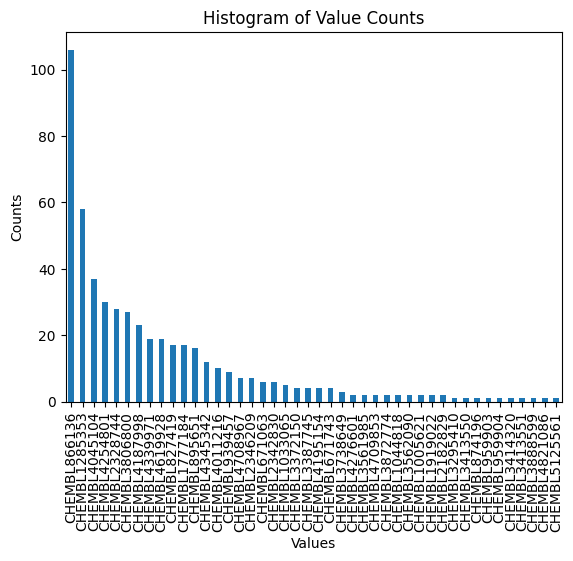

In [ ]:
value_counts.plot(kind='bar')
plt.title('Histogram of Value Counts')
plt.xlabel('Values')
plt.ylabel('Counts')

Number of rows dropped: 169 out of 506


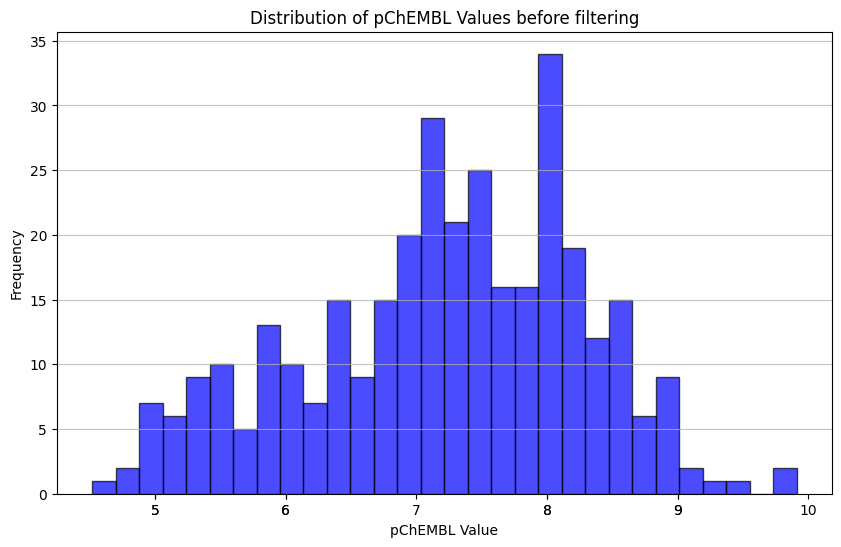

In [ ]:
# Original number of rows
original_row_count = df_ic50.shape[0]

# Convert to numeric and create a new dataset, dropping NaN values
cleaned_df = df_ic50[pd.to_numeric(df_ic50['pChEMBL Value'], errors='coerce').notna()].copy()
cleaned_df['pChEMBL Value'] = pd.to_numeric(cleaned_df['pChEMBL Value'])

# Number of rows dropped
dropped_row_count = original_row_count - cleaned_df.shape[0]

# Print the number of rows dropped and the total number
print(f"Number of rows dropped: {dropped_row_count} out of {original_row_count}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['pChEMBL Value'], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('pChEMBL Value')
plt.ylabel('Frequency')
plt.title('Distribution of pChEMBL Values before filtering')

# Round x-axis ticks
if not cleaned_df['pChEMBL Value'].empty:
    x_ticks = np.round(np.linspace(start=cleaned_df['pChEMBL Value'].min(),
                                    stop=cleaned_df['pChEMBL Value'].max(),
                                    num=10))
    plt.xticks(x_ticks)

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()

### Create a DataFrame that contains only the rows corresponding to the top 10 Assay ChEMBL ID values by count for IC50

In [ ]:
top_10_value_counts = value_counts.head(10)

# Sum the counts
total_sum = np.sum(top_10_value_counts)

# Filter the original DataFrame to only include rows with the top 10 'Assay ChEMBL ID'
df_top_10_ic50 = df_ic50[df_ic50['Assay ChEMBL ID'].isin(top_10_value_counts.index)]

# Print the top 10 value counts and the total sum
print(top_10_value_counts)
print(f"Total Sum: {total_sum}")

# Display the new filtered DataFrame
df_top_10_ic50.head()  # Display the first few rows of the filtered DataFrame

Assay ChEMBL ID
CHEMBL866136     106
CHEMBL1285353     58
CHEMBL4045104     37
CHEMBL4254801     30
CHEMBL2328744     28
CHEMBL3806800     27
CHEMBL4187998     23
CHEMBL4339971     19
CHEMBL4619928     19
CHEMBL827419      17
Name: count, dtype: int64
Total Sum: 364


,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
194,CHEMBL301242,5.54,5,O=C(NCCCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1cccc2c1-c1...,IC50,'=',35.6,nM,7.45,CHEMBL827419,Mitogenic stimulation or antagonism of 30 nM q...,BAO_0000219,cell-based format,None,F,None,CHO,O=C(NCCCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1cccc2c1-c1...,Homo sapiens
501,CHEMBL4074326,3.55,12l,Cc1nc2n(c(=O)c1CCN1CCN(c3cccc4sccc34)CC1)CCC=C...,IC50,'=',9.44,nM,8.03,CHEMBL4045104,Antagonist activity at dopamine D2 receptor (u...,BAO_0000357,single protein format,None,F,None,None,Cc1nc2n(c(=O)c1CCN1CCN(c3cccc4sccc34)CC1)CCC=C...,Homo sapiens
502,CHEMBL4104261,3.94,12f,Cc1nc2n(c(=O)c1CCN1CCN(c3cccc4sccc34)CC1)CCCC2F,IC50,'=',3.32,nM,8.48,CHEMBL4045104,Antagonist activity at dopamine D2 receptor (u...,BAO_0000357,single protein format,None,F,None,None,Cc1nc2n(c(=O)c1CCN1CCN(c3cccc4sccc34)CC1)CCCC2F,Homo sapiens
503,CHEMBL4074373,3.33,12a,Cc1nc2n(c(=O)c1CCN1CCN(c3nsc4ccccc34)CC1)CCCC2F,IC50,'=',7.8,nM,8.11,CHEMBL4045104,Antagonist activity at dopamine D2 receptor (u...,BAO_0000357,single protein format,None,F,None,None,Cc1nc2n(c(=O)c1CCN1CCN(c3nsc4ccccc34)CC1)CCCC2F,Homo sapiens
504,CHEMBL4091554,2.35,10l,Cc1nc2n(c(=O)c1CCN1CCN(c3cncc4sccc34)CC1)CCCC2O,IC50,'=',960.0,nM,6.02,CHEMBL4045104,Antagonist activity at dopamine D2 receptor (u...,BAO_0000357,single protein format,None,F,None,None,Cc1nc2n(c(=O)c1CCN1CCN(c3cncc4sccc34)CC1)CCCC2O,Homo sapiens


In [ ]:
df_top_10_ic50.shape

(364, 19)

### Filter duplicates out, keeping the ones with the highest pChEMBL Value

In [ ]:
# Sort the DataFrame by 'Canonical_SMILES' and 'pChEMBL Value' (highest value first)
df_top_10_ic50_sorted = df_top_10_ic50.sort_values(by=['Canonical_SMILES', 'pChEMBL Value'], ascending=[True, False])

# Drop duplicates, keeping the first occurrence (which will have the highest 'pChEMBL Value' after sorting)
df_top_10_ic50_no_duplicates = df_top_10_ic50_sorted.drop_duplicates(subset=['Canonical_SMILES'], keep='first')

# Find the kicked-out rows
kicked_out_rows = df_top_10_ic50_sorted[~df_top_10_ic50_sorted.index.isin(df_top_10_ic50_no_duplicates.index)]

# Display the kicked-out rows
print("Kicked-out rows:")
print(kicked_out_rows.head())

# Display the resulting DataFrame with duplicates removed, keeping the highest 'pChEMBL Value'
print("\nFiltered DataFrame (duplicates removed):")
df_top_10_ic50_no_duplicates.head()

Kicked-out rows:
      Molecule ChEMBL ID AlogP  Compound Key  \
194         CHEMBL301242  5.54             5   
19231         CHEMBL1112  4.86             6   
21668         CHEMBL1112  4.86  Aripiprazole   

                                                  Smiles Standard Type  \
194    O=C(NCCCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1cccc2c1-c1...          IC50   
19231    O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1          IC50   
21668    O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1          IC50   

      Standard Relation Standard Value Standard Units pChEMBL Value  \
194                 '='           35.6             nM          7.45   
19231               '='           17.2             nM          7.76   
21668               '='           32.0             nM          7.50   

      Assay ChEMBL ID                                  Assay Description  \
194      CHEMBL827419  Mitogenic stimulation or antagonism of 30 nM q...   
19231   CHEMBL3806800  Antagonistic activity at human do

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
13624,CHEMBL213700,3.2,36a,C=CCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,IC50,'>',10000.0,nM,None,CHEMBL866136,Antagonist activity at human recombinant D2 re...,BAO_0000219,cell-based format,None,F,None,HEK293,C=CCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,Homo sapiens
3895,CHEMBL3805600,4.93,8,CC(=O)Nc1cccc(OCCCCN2CCN(c3cccc(Cl)c3Cl)CC2)c1,IC50,'=',98.4,nM,7.01,CHEMBL3806800,Antagonistic activity at human dopamine D2 rec...,BAO_0000357,single protein format,None,F,None,None,CC(=O)Nc1cccc(OCCCCN2CCN(c3cccc(Cl)c3Cl)CC2)c1,Homo sapiens
12282,CHEMBL4290309,2.92,5a,CC(=O)O[C@@H]1[C@@H]2C[C@H]([C@@H]1OC(C)=O)[C@...,IC50,'=',44.6,nM,7.35,CHEMBL4254801,Antagonist activity at dopamine D2 receptor (u...,BAO_0000019,assay format,None,F,None,None,CC(=O)O[C@@H]1[C@@H]2C[C@H]([C@@H]1OC(C)=O)[C@...,Homo sapiens
16216,CHEMBL376639,3.42,35a,CC(C)O/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,IC50,'>',10000.0,nM,None,CHEMBL866136,Antagonist activity at human recombinant D2 re...,BAO_0000219,cell-based format,None,F,None,HEK293,CC(C)O/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,Homo sapiens
20244,CHEMBL4284353,3.44,3n,CC1(C)C2C(=O)N(CCCCN3CCN(c4cccc5sccc45)CC3)C(=...,IC50,'=',8.4,nM,8.08,CHEMBL4254801,Antagonist activity at dopamine D2 receptor (u...,BAO_0000019,assay format,None,F,None,None,CC1(C)C2C(=O)N(CCCCN3CCN(c4cccc5sccc45)CC3)C(=...,Homo sapiens


In [ ]:
df_top_10_ic50_no_duplicates.shape

(361, 19)

Number of rows dropped: 111 out of 361


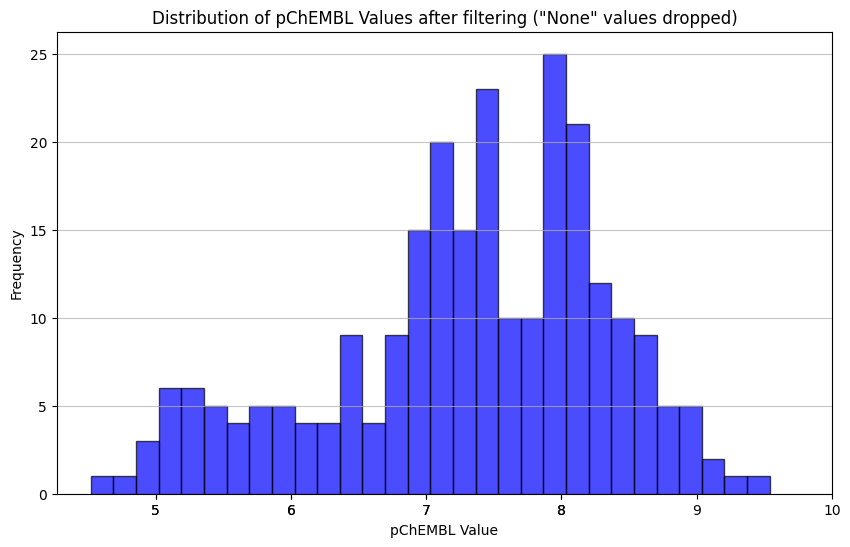

In [ ]:
# Original number of rows
original_row_count = df_top_10_ic50_no_duplicates.shape[0]

# Convert to numeric and create a new dataset, dropping NaN values
cleaned_df = df_top_10_ic50_no_duplicates[pd.to_numeric(df_top_10_ic50_no_duplicates['pChEMBL Value'], errors='coerce').notna()].copy()
cleaned_df['pChEMBL Value'] = pd.to_numeric(cleaned_df['pChEMBL Value'])

# Number of rows dropped
dropped_row_count = original_row_count - cleaned_df.shape[0]

# Print the number of rows dropped and the total number
print(f"Number of rows dropped: {dropped_row_count} out of {original_row_count}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['pChEMBL Value'], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('pChEMBL Value')
plt.ylabel('Frequency')
plt.title('Distribution of pChEMBL Values after filtering ("None" values dropped)')

# Round x-axis ticks
if not cleaned_df['pChEMBL Value'].empty:
    x_ticks = np.round(np.linspace(start=cleaned_df['pChEMBL Value'].min(),
                                    stop=cleaned_df['pChEMBL Value'].max(),
                                    num=10))
    plt.xticks(x_ticks)

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()

# Analysis of EC50

In [ ]:
# Filter the DataFrame to only include rows where 'Standard Type' is 'IC50'
df_ec50 = df_filtered[df_filtered['Standard Type'] == 'EC50']

df_ec50.head()

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
28,CHEMBL133093,3.97,12d,O=C(N[C@@H]1CC[C@H]2C[C@H](N3CCN(c4ccccn4)CC3)...,EC50,'>',1000.0,nM,None,CHEMBL671809,In vitro inhibition of forskolin-stimulated cA...,BAO_0000219,cell-based format,None,F,None,GH4-C1,O=C(N[C@@H]1CC[C@H]2C[C@H](N3CCN(c4ccccn4)CC3)...,Homo sapiens
160,CHEMBL400766,3.19,15,CCCN1CCOC(c2cccc(SC)c2)C1,EC50,'>',10000.0,nM,None,CHEMBL942047,Agonist activity at human recombinant dopamine...,BAO_0000219,cell-based format,None,F,None,Pituitary gland cell,CCCN1CCOC(c2cccc(SC)c2)C1,Homo sapiens
161,CHEMBL398696,3.37,14,CCCN1CCOC(c2cccc(OC(F)(F)F)c2)C1,EC50,'>',1000.0,nM,None,CHEMBL942047,Agonist activity at human recombinant dopamine...,BAO_0000219,cell-based format,None,F,None,Pituitary gland cell,CCCN1CCOC(c2cccc(OC(F)(F)F)c2)C1,Homo sapiens
174,CHEMBL261957,3.81,34a,CCCCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,EC50,'>',10000.0,nM,None,CHEMBL866786,Agonist activity at human recombinant D2 recep...,BAO_0000219,cell-based format,None,F,None,HEK293,CCCCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,Homo sapiens
175,CHEMBL438961,2.34,38b,N#Cc1cccnc1N1CCN(CC/C(=N/O)c2ccccc2)CC1,EC50,'>',10000.0,nM,None,CHEMBL866786,Agonist activity at human recombinant D2 recep...,BAO_0000219,cell-based format,None,F,None,HEK293,N#Cc1cccnc1N1CCN(CC/C(=N/O)c2ccccc2)CC1,Homo sapiens


In [ ]:
#number of compounds
df_ec50.shape

(1201, 19)

In [ ]:
value_counts = df_ec50['Assay ChEMBL ID'].value_counts().head(30)
np.sum(value_counts)
print(value_counts)

Assay ChEMBL ID
CHEMBL866786     106
CHEMBL4842095     91
CHEMBL4842093     89
CHEMBL4394473     59
CHEMBL3396204     54
CHEMBL4345332     44
CHEMBL3887361     43
CHEMBL4010159     40
CHEMBL2169116     37
CHEMBL902499      37
CHEMBL4010165     32
CHEMBL942047      31
CHEMBL3293227     30
CHEMBL2168916     28
CHEMBL3887360     25
CHEMBL3587537     24
CHEMBL1106075     23
CHEMBL3100268     19
CHEMBL4011214     18
CHEMBL4008740     16
CHEMBL4815488     15
CHEMBL3801486     14
CHEMBL5151480     13
CHEMBL838013      12
CHEMBL4015818     11
CHEMBL3614297     10
CHEMBL2168902     10
CHEMBL4842103     10
CHEMBL4736186      9
CHEMBL3117733      8
Name: count, dtype: int64


Text(0, 0.5, 'Counts')

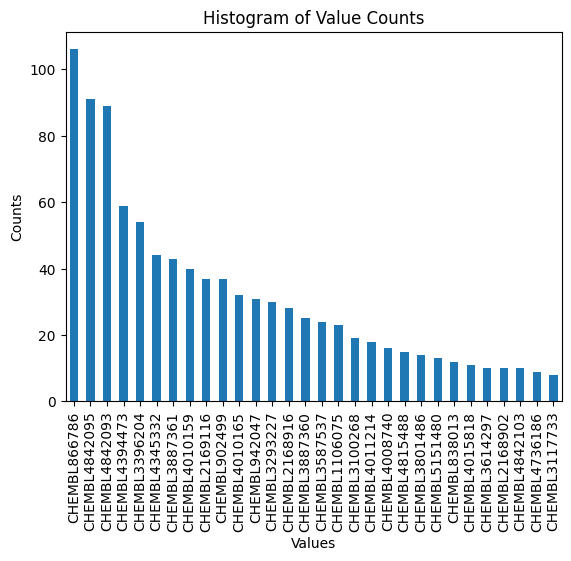

In [ ]:
value_counts.plot(kind='bar')
plt.title('Histogram of Value Counts')
plt.xlabel('Values')
plt.ylabel('Counts')

Number of rows dropped: 317 out of 1201


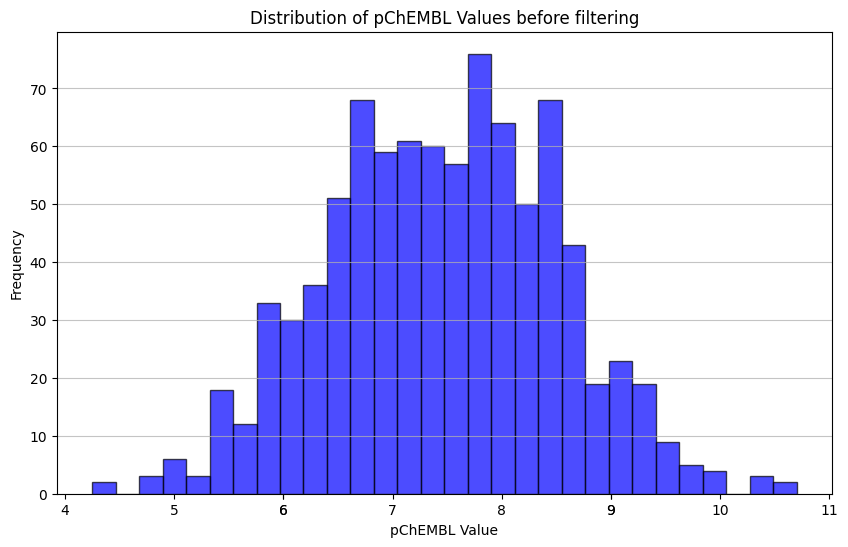

In [ ]:
# Original number of rows
original_row_count = df_ec50.shape[0]

# Convert to numeric and create a new dataset, dropping NaN values
cleaned_df = df_ec50[pd.to_numeric(df_ec50['pChEMBL Value'], errors='coerce').notna()].copy()
cleaned_df['pChEMBL Value'] = pd.to_numeric(cleaned_df['pChEMBL Value'])

# Number of rows dropped
dropped_row_count = original_row_count - cleaned_df.shape[0]

# Print the number of rows dropped and the total number
print(f"Number of rows dropped: {dropped_row_count} out of {original_row_count}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['pChEMBL Value'], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('pChEMBL Value')
plt.ylabel('Frequency')
plt.title('Distribution of pChEMBL Values before filtering')

# Round x-axis ticks
if not cleaned_df['pChEMBL Value'].empty:
    x_ticks = np.round(np.linspace(start=cleaned_df['pChEMBL Value'].min(),
                                    stop=cleaned_df['pChEMBL Value'].max(),
                                    num=10))
    plt.xticks(x_ticks)

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()

### Create a DataFrame that contains only the rows corresponding to the top 10 Assay ChEMBL ID values by count for EC50

In [ ]:
top_10_value_counts = value_counts.head(10)

# Sum the counts
total_sum = np.sum(top_10_value_counts)

# Filter the original DataFrame to only include rows with the top 10 'Assay ChEMBL ID'
df_top_10_ec50 = df_ec50[df_ec50['Assay ChEMBL ID'].isin(top_10_value_counts.index)]

# Print the top 10 value counts and the total sum
print(top_10_value_counts)
print(f"Total Sum: {total_sum}")

# Display the new filtered DataFrame
df_top_10_ec50.head()  # Display the first few rows of the filtered DataFrame

Assay ChEMBL ID
CHEMBL866786     106
CHEMBL4842095     91
CHEMBL4842093     89
CHEMBL4394473     59
CHEMBL3396204     54
CHEMBL4345332     44
CHEMBL3887361     43
CHEMBL4010159     40
CHEMBL2169116     37
CHEMBL902499      37
Name: count, dtype: int64
Total Sum: 600


,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
174,CHEMBL261957,3.81,34a,CCCCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,EC50,'>',10000.0,nM,None,CHEMBL866786,Agonist activity at human recombinant D2 recep...,BAO_0000219,cell-based format,None,F,None,HEK293,CCCCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,Homo sapiens
175,CHEMBL438961,2.34,38b,N#Cc1cccnc1N1CCN(CC/C(=N/O)c2ccccc2)CC1,EC50,'>',10000.0,nM,None,CHEMBL866786,Agonist activity at human recombinant D2 recep...,BAO_0000219,cell-based format,None,F,None,HEK293,N#Cc1cccnc1N1CCN(CC/C(=N/O)c2ccccc2)CC1,Homo sapiens
176,CHEMBL212969,2.78,58a,CO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccc(F)cc1,EC50,'>',10000.0,nM,None,CHEMBL866786,Agonist activity at human recombinant D2 recep...,BAO_0000219,cell-based format,None,F,None,HEK293,CO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccc(F)cc1,Homo sapiens
177,CHEMBL212235,3.3,59a,CO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccc(Cl)cc1,EC50,'>',10000.0,nM,None,CHEMBL866786,Agonist activity at human recombinant D2 recep...,BAO_0000219,cell-based format,None,F,None,HEK293,CO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccc(Cl)cc1,Homo sapiens
193,CHEMBL246438,4.96,28,COC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1,EC50,'=',34.7,nM,7.46,CHEMBL902499,Antagonist activity at human dopamine D2 recep...,BAO_0000219,cell-based format,None,F,None,CHO,COC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1,Homo sapiens


In [ ]:
df_top_10_ec50.shape

(600, 19)

### Filter duplicates out, keeping the ones with the highest pChEMBL Value

In [ ]:
# Sort the DataFrame by 'Canonical_SMILES' and 'pChEMBL Value' (highest value first)
df_top_10_ec50_sorted = df_top_10_ec50.sort_values(by=['Canonical_SMILES', 'pChEMBL Value'], ascending=[True, False])

# Drop duplicates, keeping the first occurrence (which will have the highest 'pChEMBL Value' after sorting)
df_top_10_ec50_no_duplicates = df_top_10_ec50_sorted.drop_duplicates(subset=['Canonical_SMILES'], keep='first')

# Find the kicked-out rows
kicked_out_rows = df_top_10_ec50_sorted[~df_top_10_ec50_sorted.index.isin(df_top_10_ec50_no_duplicates.index)]

# Display the kicked-out rows
print("Kicked-out rows:")
print(kicked_out_rows.head())

# Display the resulting DataFrame with duplicates removed, keeping the highest 'pChEMBL Value'
print("\nFiltered DataFrame (duplicates removed):")
df_top_10_ec50_no_duplicates.head()

Kicked-out rows:
      Molecule ChEMBL ID AlogP Compound Key  \
20907      CHEMBL3088210  3.13           25   
5704       CHEMBL4438800  4.05            7   
21349      CHEMBL4537900  4.41           11   
19554      CHEMBL4523054   3.6            9   
20077      CHEMBL4581262  3.94            8   

                                                  Smiles Standard Type  \
20907          CC(=O)N[C@H]1CC[C@H](CCN2CCc3ccccc3C2)CC1          EC50   
5704   CC(=O)Oc1c(Br)cc2c(c1OC(C)=O)-c1cccc3c1[C@@H](...          EC50   
21349  CC(=O)Oc1c(C(C)C)cc2c(c1OC(C)=O)-c1cccc3c1[C@@...          EC50   
19554  CC(=O)Oc1c(C)cc2c(c1OC(C)=O)-c1cccc3c1[C@@H](C...          EC50   
20077  CC(=O)Oc1c(Cl)cc2c(c1OC(C)=O)-c1cccc3c1[C@@H](...          EC50   

      Standard Relation Standard Value Standard Units pChEMBL Value  \
20907               '='          54.95             nM          7.26   
5704                '>'        10000.0             nM          None   
21349               '>'        10000.0    

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
1183,CHEMBL213700,3.2,36a,C=CCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,EC50,'>',10000.0,nM,None,CHEMBL866786,Agonist activity at human recombinant D2 recep...,BAO_0000219,cell-based format,None,F,None,HEK293,C=CCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,Homo sapiens
9778,CHEMBL400826,5.52,29,C=CCOC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1,EC50,None,None,None,None,CHEMBL902499,Antagonist activity at human dopamine D2 recep...,BAO_0000219,cell-based format,None,F,None,CHO,C=CCOC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1,Homo sapiens
16475,CHEMBL246021,4.45,20,CC(=O)NC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1,EC50,'=',24.8,nM,7.61,CHEMBL902499,Antagonist activity at human dopamine D2 recep...,BAO_0000219,cell-based format,None,F,None,CHO,CC(=O)NC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1,Homo sapiens
16480,CHEMBL399601,4.49,26,CC(=O)NCC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1,EC50,None,None,None,None,CHEMBL902499,Antagonist activity at human dopamine D2 recep...,BAO_0000219,cell-based format,None,F,None,CHO,CC(=O)NCC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1,Homo sapiens
16295,CHEMBL3088210,3.13,25,CC(=O)N[C@H]1CC[C@H](CCN2CCc3ccccc3C2)CC1,EC50,'=',54.0,nM,7.27,CHEMBL4394473,Partial agonist activity at human Gi/o-coupled...,BAO_0000219,cell-based format,None,F,None,None,CC(=O)N[C@H]1CC[C@H](CCN2CCc3ccccc3C2)CC1,Homo sapiens


In [ ]:
df_top_10_ec50_no_duplicates.shape

(353, 19)

Number of rows dropped: 166 out of 353


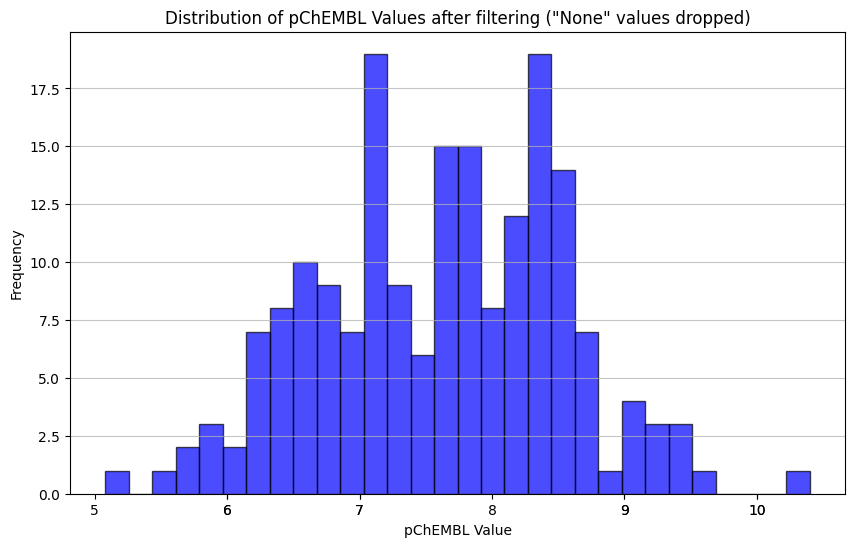

In [ ]:
# Original number of rows
original_row_count = df_top_10_ec50_no_duplicates.shape[0]

# Convert to numeric and create a new dataset, dropping NaN values
cleaned_df = df_top_10_ec50_no_duplicates[pd.to_numeric(df_top_10_ec50_no_duplicates['pChEMBL Value'], errors='coerce').notna()].copy()
cleaned_df['pChEMBL Value'] = pd.to_numeric(cleaned_df['pChEMBL Value'])

# Number of rows dropped
dropped_row_count = original_row_count - cleaned_df.shape[0]

# Print the number of rows dropped and the total number
print(f"Number of rows dropped: {dropped_row_count} out of {original_row_count}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['pChEMBL Value'], bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('pChEMBL Value')
plt.ylabel('Frequency')
plt.title('Distribution of pChEMBL Values after filtering ("None" values dropped)')

# Round x-axis ticks
if not cleaned_df['pChEMBL Value'].empty:
    x_ticks = np.round(np.linspace(start=cleaned_df['pChEMBL Value'].min(),
                                    stop=cleaned_df['pChEMBL Value'].max(),
                                    num=10))
    plt.xticks(x_ticks)

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()

# Analysis of pIC50

In [ ]:
# Filter the DataFrame to only include rows where 'Standard Type' is 'IC50'
df_pic50 = df_filtered[df_filtered['Standard Type'] == 'pIC50']

df_pic50.head()

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism


In [ ]:
df_pic50.shape

(0, 19)

In [ ]:
value_counts = df_pic50['Assay ChEMBL ID'].value_counts().head(30)
np.sum(value_counts)
print(value_counts)

Series([], Name: count, dtype: int64)


In [ ]:
#value_counts.plot(kind='bar')
#plt.title('Histogram of Value Counts')
#plt.xlabel('Values')
#plt.ylabel('Counts')

# Analysis of pEC50

In [ ]:
# Filter the DataFrame to only include rows where 'Standard Type' is 'IC50'
df_pec50 = df_filtered[df_filtered['Standard Type'] == 'pEC50']

df_pec50.head()

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
2865,CHEMBL3613873,2.68,43,COc1ccccc1N1CCN(CCCc2cn(-c3ccn4nccc4c3)nn2)CC1,pEC50,None,None,None,None,CHEMBL3614299,Activity at dopamine D2S receptor (unknown ori...,BAO_0000219,cell-based format,None,F,None,HEK293,COc1ccccc1N1CCN(CCCc2cn(-c3ccn4nccc4c3)nn2)CC1,Homo sapiens
4025,CHEMBL4439118,2.49,32,CN(C)C(=O)NCCCCCN1CCc2ccccc2C1,pEC50,None,None,None,None,CHEMBL4394473,Partial agonist activity at human Gi/o-coupled...,BAO_0000219,cell-based format,None,F,None,None,CN(C)C(=O)NCCCCCN1CCc2ccccc2C1,Homo sapiens
7258,CHEMBL3394267,2.17,33,CC(C)(C)OC(=O)N1CCC(Nc2nc(N)n3nc(-c4ccco4)nc3n...,pEC50,None,None,None,None,CHEMBL3396204,Agonist activity at human dopamine D2L recepto...,BAO_0000219,cell-based format,None,F,None,CHO,CC(C)(C)OC(=O)N1CCC(Nc2nc(N)n3nc(-c4ccco4)nc3n...,Homo sapiens
7890,CHEMBL3613880,4.37,57,Clc1cccc(N2CCN(CCCCc3cn(-c4ccn5nccc5c4)nn3)CC2...,pEC50,None,None,None,None,CHEMBL3614299,Activity at dopamine D2S receptor (unknown ori...,BAO_0000219,cell-based format,None,F,None,HEK293,Clc1cccc(N2CCN(CCCCc3cn(-c4ccn5nccc5c4)nn3)CC2...,Homo sapiens
8803,CHEMBL3287402,4.43,7f,O=Cc1cc2cc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)ccn2n1,pEC50,None,None,None,None,CHEMBL3293227,Agonist activity at human dopamine D2 short re...,BAO_0000219,cell-based format,None,F,None,HEK293,O=Cc1cc2cc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)ccn2n1,Homo sapiens


In [ ]:
df_pec50.shape

(10, 19)

In [ ]:
value_counts = df_pec50['Assay ChEMBL ID'].value_counts().head(30)
np.sum(value_counts)
print(value_counts)

Assay ChEMBL ID
CHEMBL3614299    3
CHEMBL4394473    3
CHEMBL3396204    2
CHEMBL3293227    2
Name: count, dtype: int64


Text(0, 0.5, 'Counts')

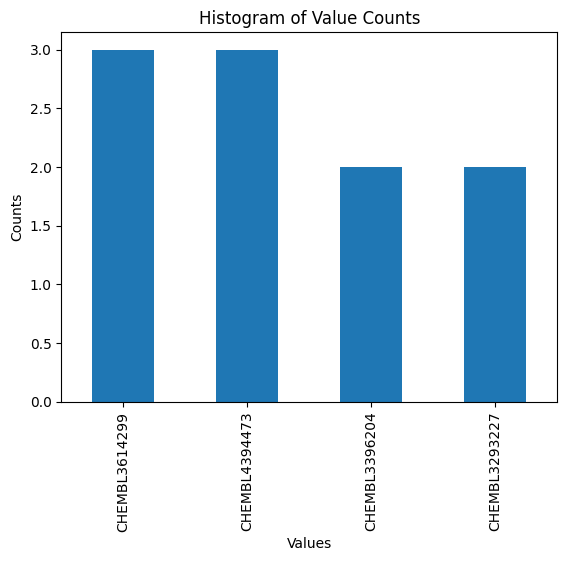

In [ ]:
value_counts.plot(kind='bar')
plt.title('Histogram of Value Counts')
plt.xlabel('Values')
plt.ylabel('Counts')

### Concatenate the two dataframes

In [ ]:
# Concatenate the two DataFrames along the rows (axis=0)
df_concatenated = pd.concat([df_top_10_ic50_no_duplicates, df_top_10_ec50_no_duplicates], axis=0)

# Display the concatenated DataFrame
df_concatenated.head()  # Show the first few rows of the concatenated DataFrame

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
13624,CHEMBL213700,3.2,36a,C=CCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,IC50,'>',10000.0,nM,None,CHEMBL866136,Antagonist activity at human recombinant D2 re...,BAO_0000219,cell-based format,None,F,None,HEK293,C=CCO/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,Homo sapiens
3895,CHEMBL3805600,4.93,8,CC(=O)Nc1cccc(OCCCCN2CCN(c3cccc(Cl)c3Cl)CC2)c1,IC50,'=',98.4,nM,7.01,CHEMBL3806800,Antagonistic activity at human dopamine D2 rec...,BAO_0000357,single protein format,None,F,None,None,CC(=O)Nc1cccc(OCCCCN2CCN(c3cccc(Cl)c3Cl)CC2)c1,Homo sapiens
12282,CHEMBL4290309,2.92,5a,CC(=O)O[C@@H]1[C@@H]2C[C@H]([C@@H]1OC(C)=O)[C@...,IC50,'=',44.6,nM,7.35,CHEMBL4254801,Antagonist activity at dopamine D2 receptor (u...,BAO_0000019,assay format,None,F,None,None,CC(=O)O[C@@H]1[C@@H]2C[C@H]([C@@H]1OC(C)=O)[C@...,Homo sapiens
16216,CHEMBL376639,3.42,35a,CC(C)O/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,IC50,'>',10000.0,nM,None,CHEMBL866136,Antagonist activity at human recombinant D2 re...,BAO_0000219,cell-based format,None,F,None,HEK293,CC(C)O/N=C(\CCN1CCN(c2ccccn2)CC1)c1ccccc1,Homo sapiens
20244,CHEMBL4284353,3.44,3n,CC1(C)C2C(=O)N(CCCCN3CCN(c4cccc5sccc45)CC3)C(=...,IC50,'=',8.4,nM,8.08,CHEMBL4254801,Antagonist activity at dopamine D2 receptor (u...,BAO_0000019,assay format,None,F,None,None,CC1(C)C2C(=O)N(CCCCN3CCN(c4cccc5sccc45)CC3)C(=...,Homo sapiens


In [ ]:
df_concatenated.shape

(714, 19)

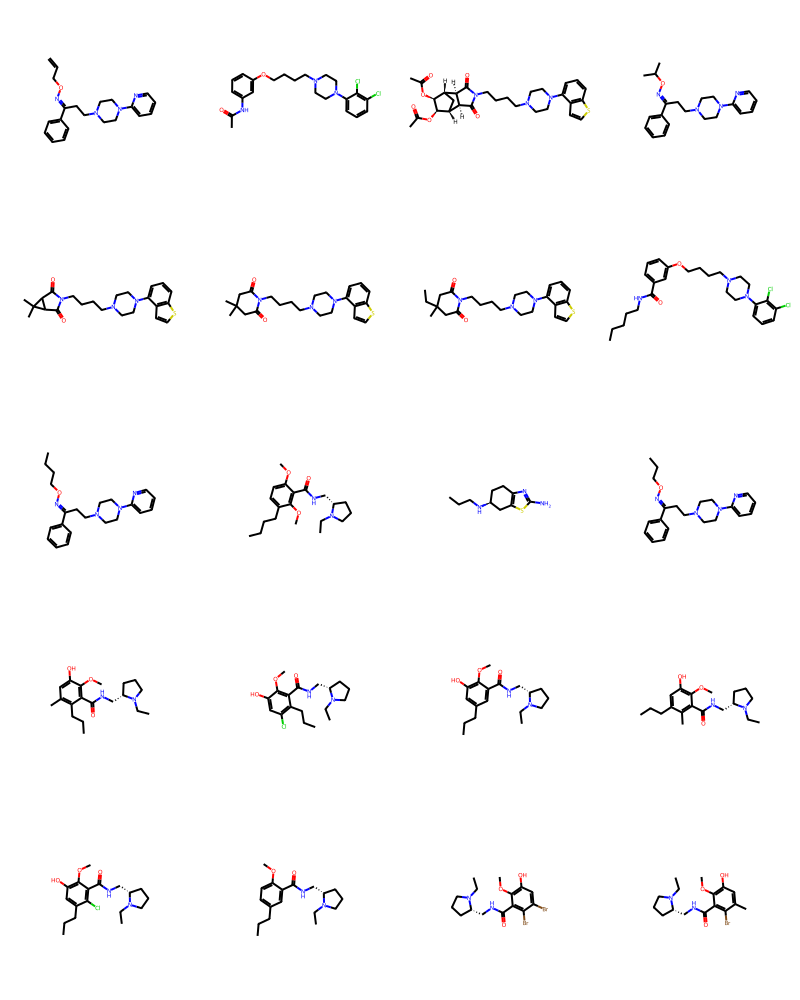

In [ ]:
unique_mols = [Chem.MolFromSmiles(smiles) for smiles in df_concatenated['Canonical_SMILES'].head(20)]
Draw.MolsToGridImage(unique_mols, molsPerRow=4)

### Exctract the IDs of all Assays we are using in the concatenated dataframe and print their description

In [ ]:
# Extract all unique values from the 'Assay ChEMBL ID' column
unique_assay_chembl_ids = df_concatenated['Assay ChEMBL ID'].unique()

# Convert the array of unique values into a list
unique_assay_chembl_ids_list = unique_assay_chembl_ids.tolist()

# Print the list of unique Assay ChEMBL IDs
print(unique_assay_chembl_ids_list)

['CHEMBL866136', 'CHEMBL3806800', 'CHEMBL4254801', 'CHEMBL1285353', 'CHEMBL2328744', 'CHEMBL4187998', 'CHEMBL4339971', 'CHEMBL827419', 'CHEMBL4619928', 'CHEMBL4045104', 'CHEMBL866786', 'CHEMBL902499', 'CHEMBL4394473', 'CHEMBL3887361', 'CHEMBL4345332', 'CHEMBL3396204', 'CHEMBL2169116', 'CHEMBL4842093', 'CHEMBL4010159', 'CHEMBL4842095']


In [ ]:
# Write your SQL query
query = "SELECT * FROM AssaysD2"

# Use pandas to read the SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Print the column names of the DataFrame
print(df.columns)

# Display the first few rows of the table
df.head()

Index(['ChEMBL ID', 'Assay Type', 'Description', 'Organism', 'Compounds',
       'Activities', 'BAO Format ID', 'BAO Format', 'Confidence Score',
       'Confidence Label', 'Strain', 'Source', 'Tax ID', 'Tissue ChEMBL ID',
       'Tissue Name', 'Cell Type', 'Subcellular Fraction',
       'Document ChEMBL ID', 'PubMed ID', 'DOI', 'Year', 'Journal', 'Volume',
       'First Page', 'Last Page', 'Assay Parameters',
       'Assay Classification L1', 'Assay Classification L2',
       'Assay Classification L3', 'Variant Sequence Accession',
       'Variant Sequence Mutation'],
      dtype='object')


,ChEMBL ID,Assay Type,Description,Organism,Compounds,Activities,BAO Format ID,BAO Format,Confidence Score,Confidence Label,...,Journal,Volume,First Page,Last Page,Assay Parameters,Assay Classification L1,Assay Classification L2,Assay Classification L3,Variant Sequence Accession,Variant Sequence Mutation
0,CHEMBL670741,B,Compound was evaluated for the binding affinit...,None,1,1,BAO_0000219,cell-based format,8,8 - Homologous single protein target assigned,...,J Med Chem,36,1053,1068,None,None,None,None,None,None
1,CHEMBL1212473,B,Displacement of [3H]spiperone from human recom...,Homo sapiens,1,1,BAO_0000219,cell-based format,9,9 - Direct single protein target assigned,...,Bioorg Med Chem Lett,20,4406,4411,None,None,None,None,None,None
2,CHEMBL1227765,B,Displacement of [3H]spiperone from human D2L r...,Homo sapiens,3,3,BAO_0000357,single protein format,9,9 - Direct single protein target assigned,...,Bioorg Med Chem Lett,20,5199,5202,None,None,None,None,None,None
3,CHEMBL1117361,B,Inhibition of dopamine D2S receptor at 1 uM,None,5,5,BAO_0000357,single protein format,8,8 - Homologous single protein target assigned,...,Bioorg Med Chem Lett,20,3017,3020,None,None,None,None,None,None
4,CHEMBL672310,B,Binding affinity for Dopamine receptor D2 by d...,None,9,9,BAO_0000357,single protein format,8,8 - Homologous single protein target assigned,...,Bioorg Med Chem Lett,10,509,512,None,None,None,None,None,None


In [ ]:
# Loop through the unique Assay ChEMBL IDs and print the corresponding Description
for assay_id in unique_assay_chembl_ids_list:
    # Filter the DataFrame to get the description for the current Assay ChEMBL ID
    description = df[df['ChEMBL ID'] == assay_id]['Description'].unique()

    # Print the Assay ChEMBL ID and its description
    print(f"Assay ChEMBL ID: {assay_id}")
    print(f"Description: {description}\n")


Assay ChEMBL ID: CHEMBL866136
Description: ['Antagonist activity at human recombinant D2 receptor expressed in HEK293 cells by FLIPR assay']

Assay ChEMBL ID: CHEMBL3806800
Description: ['Antagonistic activity at human dopamine D2 receptor measured after 60 mins by Ultra Lance cAMP assay']

Assay ChEMBL ID: CHEMBL4254801
Description: ['Antagonist activity at dopamine D2 receptor (unknown origin) after 60 mins by Ultra lance cAMP assay']

Assay ChEMBL ID: CHEMBL1285353
Description: ['Antagonist activity at dopamine D2 receptor']

Assay ChEMBL ID: CHEMBL2328744
Description: ['Antagonist activity at human D2 dopamine receptor expressed in CHO cell membrane by GTPgammaS-binding assay']

Assay ChEMBL ID: CHEMBL4187998
Description: ['Antagonistic activity at human dopamine D2 receptor measured after 60 mins by Lance Ultra cAMP assay']

Assay ChEMBL ID: CHEMBL4339971
Description: ['Antagonist activity at D2 receptor (unknown origin) expressed in CHOK1 cells assessed as inhibition of dopamine-

### pChEMBL Value Box Plot

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


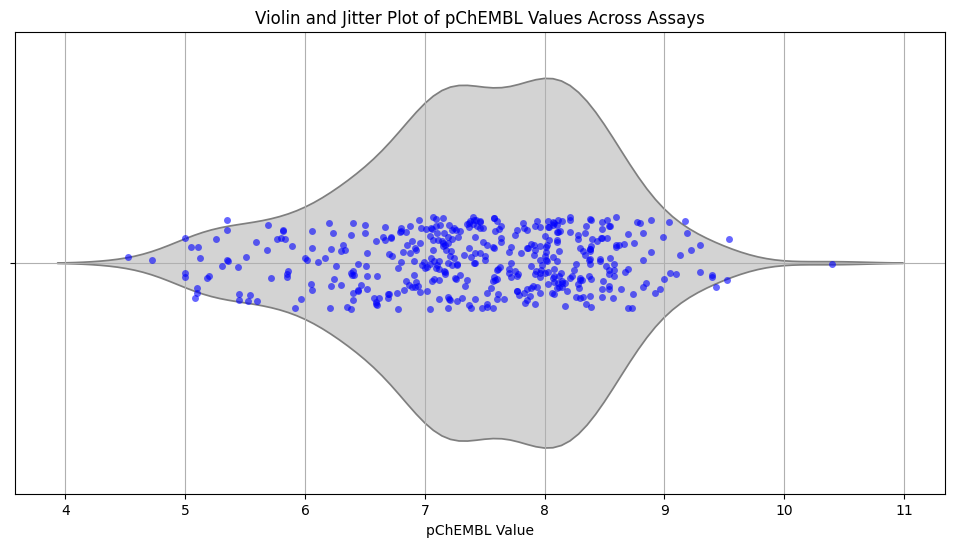

In [ ]:
import seaborn as sns
df_concatenated.loc[:, 'pChEMBL Value'] = pd.to_numeric(df_concatenated['pChEMBL Value'], errors='coerce')
df_concatenated_bp = df_concatenated.dropna(subset=['pChEMBL Value'])

plt.figure(figsize=(12, 6))
sns.violinplot(x=df_concatenated_bp['pChEMBL Value'], inner=None, color="lightgray")
sns.stripplot(x=df_concatenated_bp['pChEMBL Value'], color='blue', alpha=0.6, jitter=True)
plt.title('Violin and Jitter Plot of pChEMBL Values Across Assays')
plt.xlabel('pChEMBL Value')
plt.grid(True)
plt.show()

### IC50 Distribution, Outlier Detection, and Key Value Identification (lowest/highest)

In [ ]:
# Filtering IC50 for outlier detection
df_ic50_od = df_concatenated[df_concatenated['Standard Type'] == 'IC50']
df_ic50_od.loc[:, 'pChEMBL Value'] = pd.to_numeric(df_ic50_od['pChEMBL Value'], errors='coerce')
df_ic50_od = df_ic50_od.dropna(subset=['pChEMBL Value'])

In [ ]:
# Outlier detection using IQR
# IQR: identifies data points that fall outside the normal range, measures the
# spread of the middle 50% of the data. Outliers are values that are below Q1 minus
# 1.5 times the IQR or above Q3 plus 1.5 times the IQR
Q1 = df_ic50_od['pChEMBL Value'].quantile(0.25)
Q3 = df_ic50_od['pChEMBL Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Outliers
outliers_ic50 = df_ic50_od[(df_ic50_od['pChEMBL Value'] < lower_bound) | (df_ic50_od['pChEMBL Value'] > upper_bound)]
outliers_ic50

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
9269,CHEMBL2326489,2.3,6b,CCN1CCc2cc3nc(N)sc3cc2CC1,IC50,'=',19000.0,nM,4.72,CHEMBL2328744,Antagonist activity at human D2 dopamine recep...,BAO_0000219,cell-based format,None,F,None,CHO,CCN1CCc2cc3nc(N)sc3cc2CC1,Homo sapiens
9268,CHEMBL2326491,2.84,6d,Nc1nc2cc3c(cc2s1)CCN(CC(F)(F)F)CC3,IC50,'=',30000.0,nM,4.52,CHEMBL2328744,Antagonist activity at human D2 dopamine recep...,BAO_0000219,cell-based format,None,F,None,CHO,Nc1nc2cc3c(cc2s1)CCN(CC(F)(F)F)CC3,Homo sapiens


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


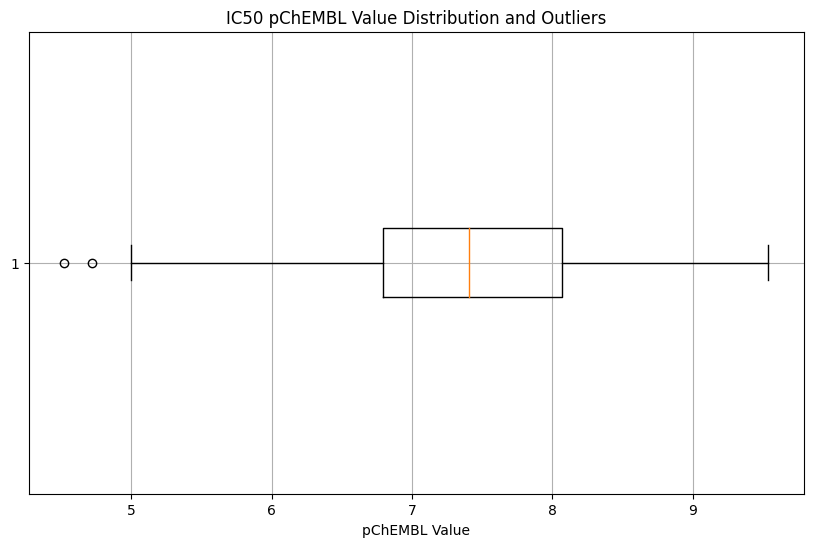

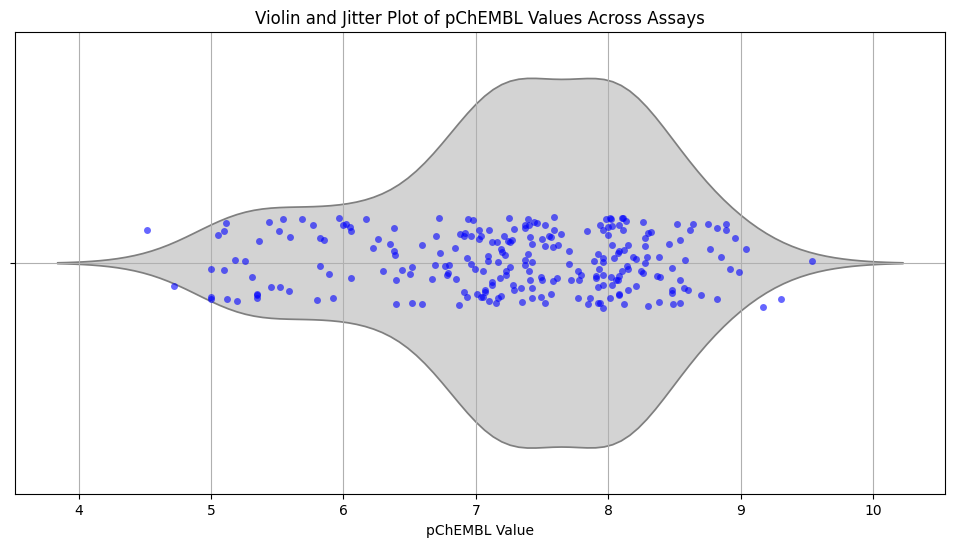

In [ ]:
# Box plot for IC50
plt.figure(figsize=(10, 6))
plt.boxplot(df_ic50_od['pChEMBL Value'], vert=False)
plt.title('IC50 pChEMBL Value Distribution and Outliers')
plt.xlabel('pChEMBL Value')
plt.grid(True)
plt.show

plt.figure(figsize=(12, 6))
sns.violinplot(x=df_ic50_od['pChEMBL Value'], inner=None, color="lightgray")
sns.stripplot(x=df_ic50_od['pChEMBL Value'], color='blue', alpha=0.6, jitter=True)
plt.title('Violin and Jitter Plot of pChEMBL Values Across Assays')
plt.xlabel('pChEMBL Value')
plt.grid(True)
plt.show()


In [ ]:
# Highest and lowest IC50 values
df_ic50_sorted = df_ic50_od.sort_values(by='pChEMBL Value', ascending=False)
top_5_ic50 = df_ic50_sorted.head(5)
bottom_5_ic50 = df_ic50_sorted.tail(5)

print("Top 5 IC50 Values:")
#print(top_5_ic50)
print(df_ic50_sorted['pChEMBL Value'].head(5))
print("\nBottom 5 IC50 Values:")
#print(bottom_5_ic50)
print(df_ic50_sorted['pChEMBL Value'].tail(5))

Top 5 IC50 Values:
14653    9.54
8227      9.3
8222     9.17
14839    9.04
19035    8.99
Name: pChEMBL Value, dtype: object

Bottom 5 IC50 Values:
15769     5.0
14639     5.0
9267      5.0
9269     4.72
9268     4.52
Name: pChEMBL Value, dtype: object


### EC50 Distribution, Outlier Detection, and Key Value Identification (lowest/highest)

In [ ]:
# Filtering EC50 for outlier detection
df_ec50_od = df_concatenated[df_concatenated['Standard Type'] == 'EC50']
df_ec50_od.loc[:, 'pChEMBL Value'] = pd.to_numeric(df_ec50_od['pChEMBL Value'], errors='coerce')
df_ec50_od = df_ec50_od.dropna(subset=['pChEMBL Value'])

In [ ]:
# Outlier detection using IQR
# IQR: identifies data points that fall outside the normal range, measures the
# spread of the middle 50% of the data. Outliers are values that are below Q1 minus
# 1.5 times the IQR or above Q3 plus 1.5 times the IQR
Q1 = df_ec50_od['pChEMBL Value'].quantile(0.25)
Q3 = df_ec50_od['pChEMBL Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Outliers
outliers_ec50 = df_ec50_od[(df_ec50_od['pChEMBL Value'] < lower_bound) | (df_ec50_od['pChEMBL Value'] > upper_bound)]
outliers_ec50

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


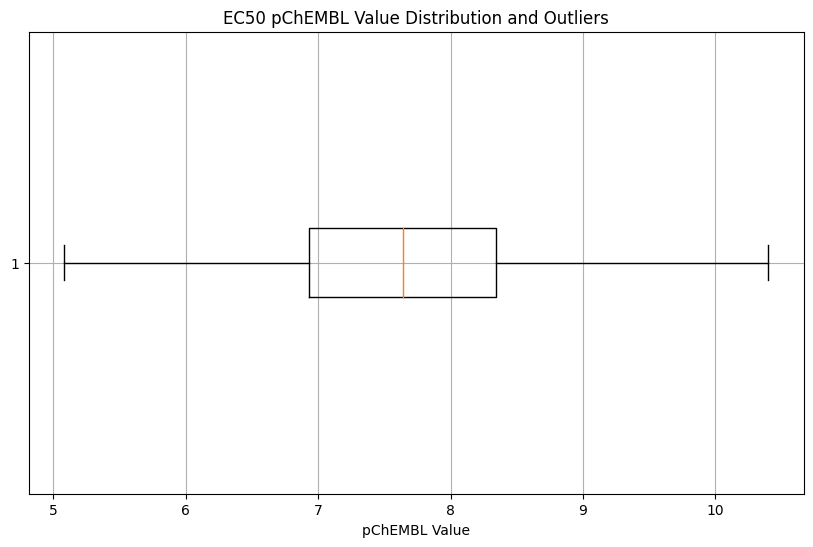

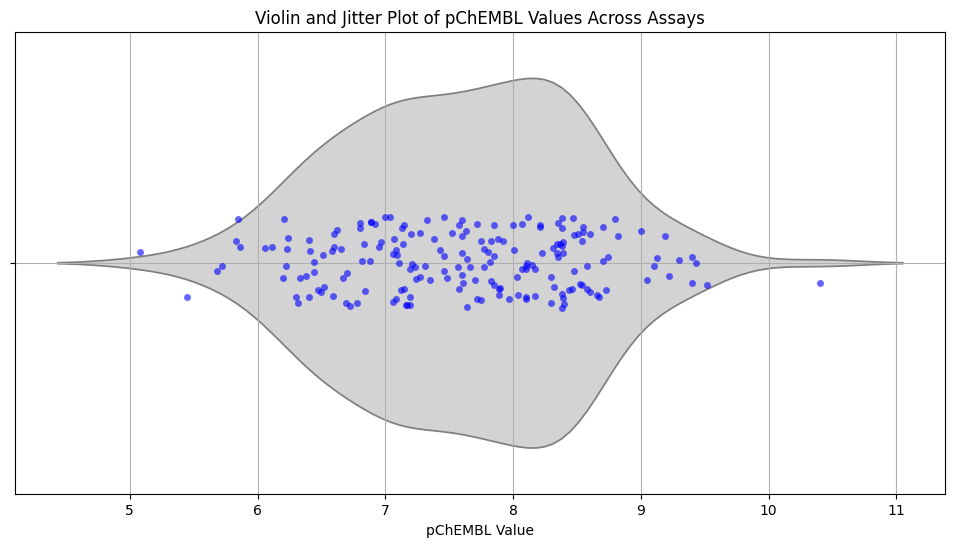

In [ ]:
# Box plot for EC50
plt.figure(figsize=(10, 6))
plt.boxplot(df_ec50_od['pChEMBL Value'], vert=False)
plt.title('EC50 pChEMBL Value Distribution and Outliers')
plt.xlabel('pChEMBL Value')
plt.grid(True)
plt.show

plt.figure(figsize=(12, 6))
sns.violinplot(x=df_ec50_od['pChEMBL Value'], inner=None, color="lightgray")
sns.stripplot(x=df_ec50_od['pChEMBL Value'], color='blue', alpha=0.6, jitter=True)
plt.title('Violin and Jitter Plot of pChEMBL Values Across Assays')
plt.xlabel('pChEMBL Value')
plt.grid(True)
plt.show()

10/3 change color of dataset ids to see reason for bimodal distribution. go back and take out the outliers based on quartile .25 on both ends

In [ ]:
# Highest and lowest EC50 values
df_ec50_sorted = df_ec50_od.sort_values(by='pChEMBL Value', ascending=False)
top_5_ec50 = df_ec50_sorted.head(5)
bottom_5_ec50 = df_ec50_sorted.tail(5)

print("Top 5 EC50 Values:")
#print(top_5_ec50)
print(df_ec50_sorted['pChEMBL Value'].head(5))
print("\nBottom 5 EC50 Values:")
#print(bottom_5_ec50)
print(df_ec50_sorted['pChEMBL Value'].tail(5))

Top 5 EC50 Values:
5701     10.4
9864     9.52
2363     9.43
21122     9.4
19632     9.4
Name: pChEMBL Value, dtype: object

Bottom 5 EC50 Values:
5705     5.83
9136     5.72
4322     5.68
3716     5.45
19551    5.08
Name: pChEMBL Value, dtype: object


Outliers identified using Z-score (|Z| > 3):


,pChEMBL Value,z_score
5701,10.4,3.036466


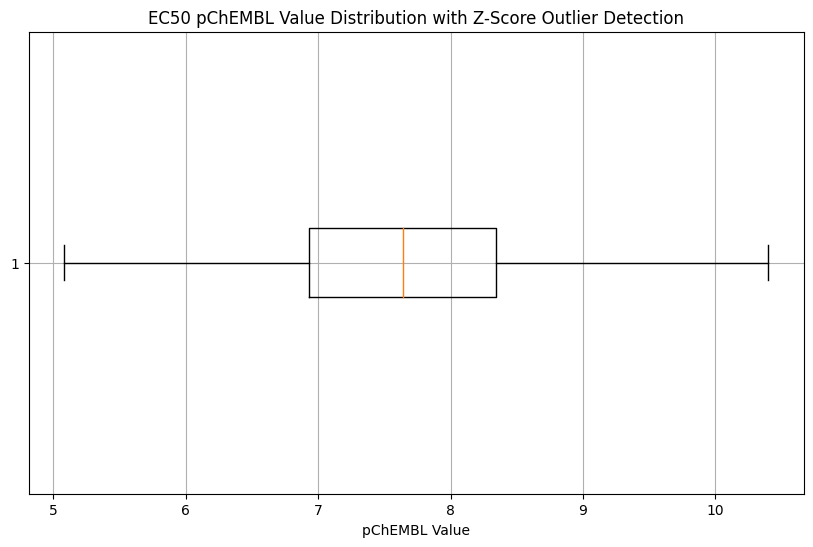

In [ ]:
from scipy.stats import zscore

df_ec50_od['pChEMBL Value'] = pd.to_numeric(df_ec50_od['pChEMBL Value'], errors='coerce')
df_ec50_od = df_ec50_od.dropna(subset=['pChEMBL Value'])

# Calculate Z-scores
df_ec50_od['z_score'] = zscore(df_ec50_od['pChEMBL Value'])

# common threshold is |Z| > 3
z_threshold = 3
outliers_ec50_z = df_ec50_od[(df_ec50_od['z_score'] > z_threshold) | (df_ec50_od['z_score'] < -z_threshold)]

print(f"Outliers identified using Z-score (|Z| > {z_threshold}):")
display(outliers_ec50_z[['pChEMBL Value', 'z_score']])

plt.figure(figsize=(10, 6))
plt.boxplot(df_ec50_od['pChEMBL Value'], vert=False)
plt.title('EC50 pChEMBL Value Distribution with Z-Score Outlier Detection')
plt.xlabel('pChEMBL Value')
plt.grid(True)
plt.show()

### pIC50 Distribution, Outlier Detection, and Key Value Identification (lowest/highest)

In [ ]:
# Filtering pIC50 for outlier detection
df_pic50_od = df_concatenated[df_concatenated['Standard Type'] == 'pIC50']
#convert to numeric
df_pic50_od.loc[:, 'pChEMBL Value'] = pd.to_numeric(df_pic50_od['pChEMBL Value'], errors='coerce')
#Dropping Rows with NaN in 'pChEMBL Value
df_pic50_od = df_pic50_od.dropna(subset=['pChEMBL Value'])

In [ ]:
# Outlier detection using IQR
# IQR: identifies data points that fall outside the normal range, measures the
# spread of the middle 50% of the data. Outliers are values that are below Q1 minus
# 1.5 times the IQR or above Q3 plus 1.5 times the IQR
Q1 = df_pic50_od['pChEMBL Value'].quantile(0.25)
Q3 = df_pic50_od['pChEMBL Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Outliers
outliers_pic50 = df_pic50_od[(df_ic50_od['pChEMBL Value'] < lower_bound) | (df_pic50_od['pChEMBL Value'] > upper_bound)]
outliers_pic50

<ipython-input-200-06c3e3d79e67>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_pic50 = df_pic50_od[(df_ic50_od['pChEMBL Value'] < lower_bound) | (df_pic50_od['pChEMBL Value'] > upper_bound)]


,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism


<function matplotlib.pyplot.show(close=None, block=None)>

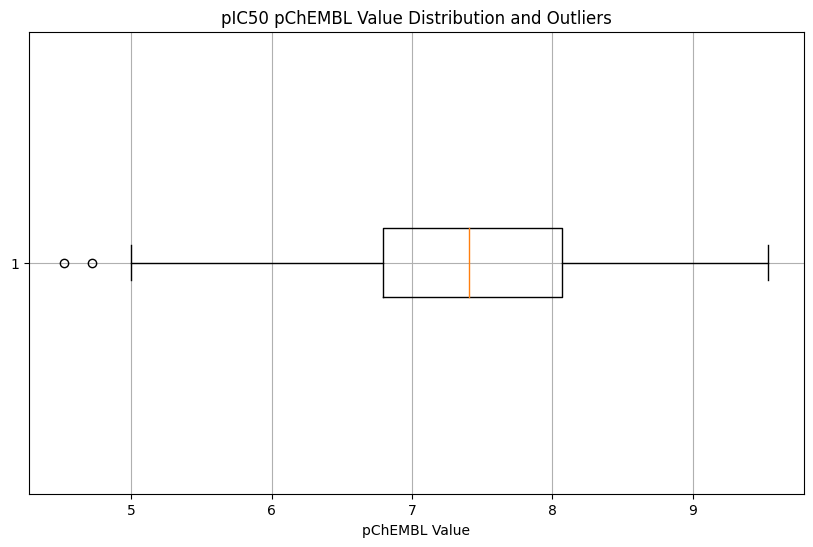

In [ ]:
# Box plot for pIC50
plt.figure(figsize=(10, 6))
plt.boxplot(df_ic50_od['pChEMBL Value'], vert=False)
plt.title('pIC50 pChEMBL Value Distribution and Outliers')
plt.xlabel('pChEMBL Value')
plt.grid(True)
plt.show


In [ ]:
# Highest and lowest pIC50 values
df_pic50_sorted = df_pic50_od.sort_values(by='pChEMBL Value', ascending=False)
top_5_pic50 = df_pic50_sorted.head(5)
bottom_5_pic50 = df_pic50_sorted.tail(5)

print("Top 5 pIC50 Values:")
#print(top_5_pic50)
print(df_pic50_sorted['pChEMBL Value'].head(5))
print("\nBottom 5 pIC50 Values:")
#print(bottom_5_pic50)
print(df_pic50_sorted['pChEMBL Value'].tail(5))

Top 5 pIC50 Values:
Series([], Name: pChEMBL Value, dtype: object)

Bottom 5 pIC50 Values:
Series([], Name: pChEMBL Value, dtype: object)


### Molecular Fingerprints : ECFP6

In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs
from rdkit.Chem import rdFingerprintGenerator


def smiles_to_ecfp6(smiles, radius=3, n_bits=2048):
    """
    Convert a SMILES string to an ECFP6 bit vector (Morgan fingerprint).
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:

    # Generate the Morgan fingerprint (ECFP6) as a bit vector
      mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=n_bits)
      fp = mfpgen.GetFingerprint(mol)
      # Convert the bit vector to a numpy array
      array = np.zeros((1,), dtype=int)
      DataStructs.ConvertToNumpyArray(fp, array)
    return array

def add_ecfp6_column(df, smiles_col='Smiles'):
    """
    Adds a new column to the DataFrame containing the ECFP6 bit vector for each SMILES.

    Parameters:
    - df: Pandas DataFrame containing SMILES strings.
    - smiles_col: Column name containing SMILES strings.

    Returns:
    - DataFrame with a new 'ECFP6' column containing the ECFP6 bit vectors.
    """
    # Apply the smiles_to_ecfp6 function to every row in the DataFrame
    df['ECFP6'] = df[smiles_col].apply(lambda x: smiles_to_ecfp6(x))
    return df

def generate_ecfp6(df, smiles_column='Smiles', radius=3, n_bits=2048):
    """
    Generate ECFP6 fingerprints for each SMILES in a DataFrame.

    Parameters:
    - df: Pandas DataFrame containing SMILES strings.
    - smiles_column: Name of the column containing SMILES strings.
    - radius: Radius for Morgan fingerprint (default is 3 for ECFP6).
    - n_bits: Number of bits in the fingerprint (default is 2048).

    Returns:
    - List of ECFP6 fingerprints (as numpy arrays).
    """
    ecfp6_list = []

    # Go through each SMILES string in the DataFrame
    for smiles in df[smiles_column]:
        try:
            # Convert the SMILES string to a molecule object
            mol = Chem.MolFromSmiles(smiles)
            if mol is not None:
                # Generate the Morgan fingerprint (ECFP6) as a bit vector
                mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=n_bits)
                fp = mfpgen.GetFingerprint(mol)

                # Convert the bit vector to a numpy array
                array = np.zeros((n_bits,), dtype=int)
                DataStructs.ConvertToNumpyArray(fp, array)

                # Append the ECFP6 bit vector to the list
                ecfp6_list.append(array)
            else:
                # If molecule conversion fails, append NaN values
                ecfp6_list.append([np.nan] * n_bits)
        except Exception as e:
            print(f"Error processing SMILES: {smiles}, Error: {e}")
            ecfp6_list.append([np.nan] * n_bits)

    return ecfp6_list

### ML Inputs with Fingerprint ECFP6

In [ ]:
ecfp6_list = generate_ecfp6(df_ic50_od)
# Convert the list of descriptor vectors to a numpy array (descriptor matrix)
X = np.array(ecfp6_list)

# Ensure 'pChEMBL Value' corresponds to each molecule
y = np.array(df_ic50_od['pChEMBL Value'])

# Check the size of X and y
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Perform the train-test split, ensuring the sizes of X and y match
if len(y) > 1 and len(X) == len(y):  # Ensure consistent sample sizes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Not enough data or inconsistent sample sizes to perform train-test split")

X shape: (250, 2048), y shape: (250,)


### Model Using Molecular Descriptors

In [ ]:
from rdkit.Chem import Descriptors
import numpy as np
from sklearn.model_selection import train_test_split


# Initialize an empty list to store the descriptor vectors
descriptor_list = []

# Go through each SMILES string in your DataFrame
for smiles in df_ic50_od['Smiles']:
    try:
        # Attempt to convert the SMILES string to a molecule object
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            # Calculate molecular descriptors
            mol_weight = Descriptors.MolWt(mol)
            logP = Descriptors.MolLogP(mol)
            tpsa = Descriptors.TPSA(mol)

            # Append the descriptor vector for the current molecule
            descriptor_list.append([mol_weight, logP, tpsa])
        else:
            # If molecule conversion fails, append NaN values
            descriptor_list.append([np.nan, np.nan, np.nan])
    except Exception as e:
        print(f"Error processing SMILES: {smiles}, Error: {e}")
        descriptor_list.append([np.nan, np.nan, np.nan])



###ML Model Inputs for Molecular Descriptor

In [ ]:

# Convert the list of descriptor vectors to a numpy array (descriptor matrix)
X = np.array(descriptor_list)

# Ensure 'pChEMBL Value' corresponds to each molecule
y = np.array(df_ic50_od['pChEMBL Value'])

# Check the size of X and y
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Perform the train-test split, ensuring the sizes of X and y match
if len(y) > 1 and len(X) == len(y):  # Ensure consistent sample sizes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Not enough data or inconsistent sample sizes to perform train-test split")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Performance with Descriptors

R^2: 0.22749815220029945


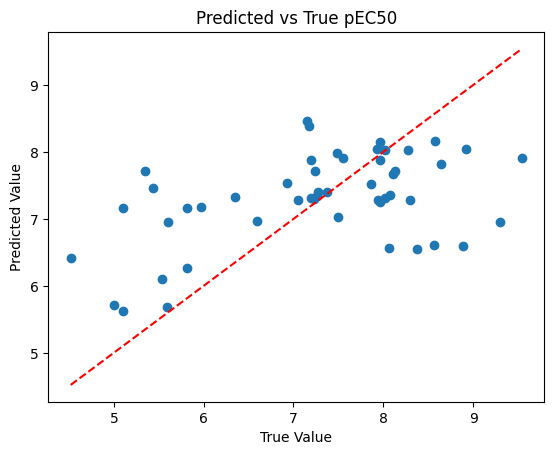

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Predict pEC50 values for the test set
y_pred = rf.predict(X_test)

# Evaluate the model using R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

# Plot predicted vs true values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs True pIC50 with Descriptors')
plt.show()

### Performance with Fingerprint

R^2: 0.7066898519740052


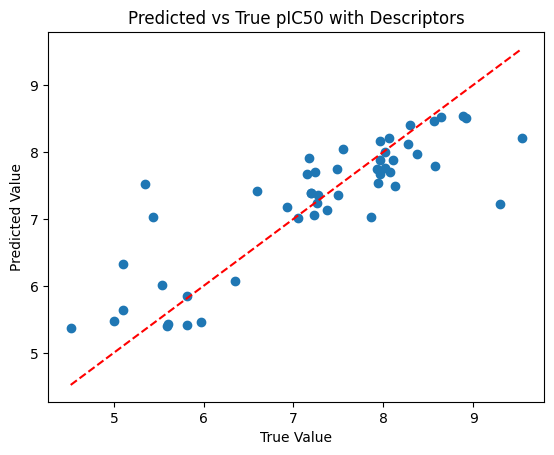

In [ ]:
# Predict pEC50 values for the test set
y_pred = rf.predict(X_test)

# Evaluate the model using R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

# Plot predicted vs true values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs True pIC50 with Descriptors')
plt.show()

In [ ]:
df.columns

Index(['ChEMBL ID', 'Assay Type', 'Description', 'Organism', 'Compounds',
       'Activities', 'BAO Format ID', 'BAO Format', 'Confidence Score',
       'Confidence Label', 'Strain', 'Source', 'Tax ID', 'Tissue ChEMBL ID',
       'Tissue Name', 'Cell Type', 'Subcellular Fraction',
       'Document ChEMBL ID', 'PubMed ID', 'DOI', 'Year', 'Journal', 'Volume',
       'First Page', 'Last Page', 'Assay Parameters',
       'Assay Classification L1', 'Assay Classification L2',
       'Assay Classification L3', 'Variant Sequence Accession',
       'Variant Sequence Mutation'],
      dtype='object')

In [ ]:

# Function to convert SMILES to canonical SMILES
def convert_to_canonical(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            return Chem.MolToSmiles(mol, canonical=True)
        else:
            return None
    except:
        return None

# Apply the conversion function to each SMILES string
df['Canonical_SMILES'] = df['Smiles'].apply(convert_to_canonical)

# Preview the dataframe to verify
print(df[['Smiles', 'Canonical_SMILES']].head())

KeyError: 'Smiles'